<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyLogic/blob/main/Python_Fuzzy_Bemutat%C3%B3_a_Tan%C3%A1rn%C5%91nek_4_Interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://youtu.be/DnfWFgovIeU?t=339

In [ ]:
%%capture
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
# Create universe

Felhőtakaró = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'sky')

Hőmérséklet = ctrl.Antecedent(np.arange(0, 120.1, 0.1), 'temperature')

Sebesség    = ctrl.Consequent(np.arange(0, 101, 1), 'speed')

In [ ]:
Sebesség.defuzzify_method = 'centroid'
Sebesség.universe.mean()

50.0

No handles with labels found to put in legend.


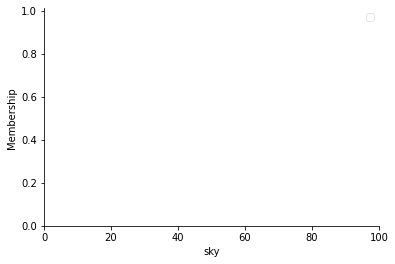

In [ ]:
Felhőtakaró.view()

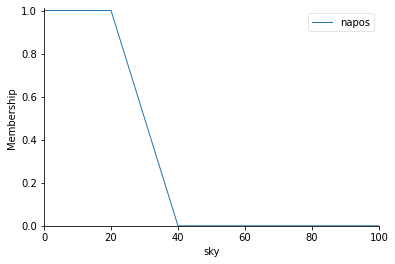

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

Felhőtakaró['napos'] = fuzzy.trapmf(Felhőtakaró.universe, [0, 0, 20, 40])

Felhőtakaró.view()

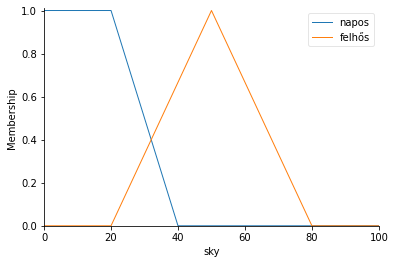

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{felhős})

Felhőtakaró['felhős'] = fuzzy.trimf(Felhőtakaró.universe, [20, 50, 80])

Felhőtakaró.view()

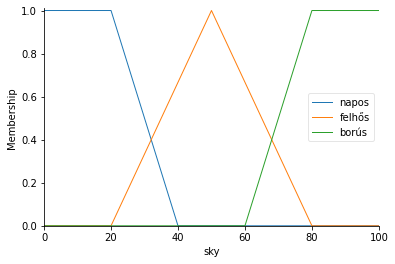

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{borús})

Felhőtakaró['borús'] = fuzzy.trapmf(Felhőtakaró.universe, [60, 80, 100, 100])

Felhőtakaró.view()

In [ ]:
# bemeneti érték 25% lesz a felhőtakaró amihez elvileg napos=0.75 és felhős=0.166 tartozik

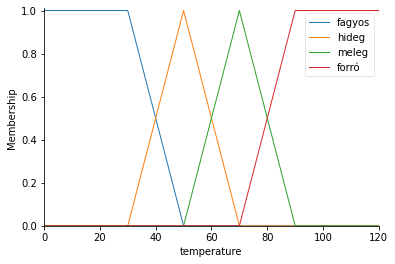

In [ ]:
# Eddig megvagyunk a Felhőtakaró változó tagsági fűggvényeivel {napos, felhős, borús}

# Most készítsük el a Hőmérséklet tagsági függvényeit is {fagyos, hideg, meleg, forró}

Hőmérséklet['fagyos'] = fuzzy.trapmf(Hőmérséklet.universe, [0, 0, 30, 50])

Hőmérséklet['hideg']  = fuzzy.trimf(Hőmérséklet.universe, [30, 50, 70])

Hőmérséklet['meleg']  = fuzzy.trimf(Hőmérséklet.universe, [50, 70, 90])

Hőmérséklet['forró']  = fuzzy.trapmf(Hőmérséklet.universe, [70, 90, 120, 120])

Hőmérséklet.view()

In [ ]:
# bemeneti érték 65F lesz a hőmérséklet amihez elvileg hideg=0.25 és meleg=0.75 érték tartozik

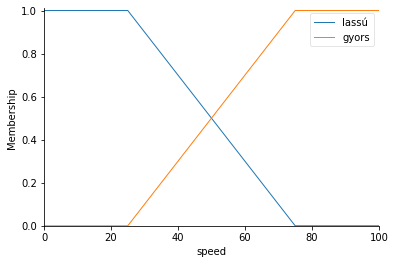

In [ ]:
# Most készítsük el a Sebesség változó tagsági függvyényeit is {Lassú, Gyors}

Sebesség['lassú']  = fuzzy.trapmf(Sebesség.universe, [0, 0, 25, 75])
Sebesség['gyors']  = fuzzy.trapmf(Sebesség.universe, [25, 75, 100, 100])

Sebesség.view()

In [ ]:
# Most készítsük el a szabályokat

rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] & Hőmérséklet['meleg'], consequent = Sebesség['gyors'])


# bemeneti érték 25% lesz a felhőtakaró amihez elvileg napos=0.75 és felhős=0.166 tartozik
# bemeneti érték 65F lesz a hőmérséklet amihez elvileg hideg=0.25 és meleg=0.75 érték tartozik

# tehát napos=0.75 és meleg=0.75 -> min(0.75, 0.75) = Sebessség['gyors'](0.75)

In [ ]:
# Most készítsük el a szabályokat

rule2 = ctrl.Rule(antecedent= Felhőtakaró['felhős'] & Hőmérséklet['hideg'], consequent = Sebesség['lassú'])


# bemeneti érték 25% lesz a felhőtakaró amihez elvileg napos=0.75 és felhős=0.166 tartozik
# bemeneti érték 65F lesz a hőmérséklet amihez elvileg hideg=0.25 és meleg=0.75 érték tartozik

# tehát felhős=0.166 és hideg=0.25 -> min(0.166, 0.25) = Sebessség['lassú'](0.166)

In [ ]:
# tehát a fenti bemeneti értékek és szabályok alapján a
# Sebesség['lassú'](0.166) és
# Sebesség['gyors'](0.75)

In [ ]:
def fuzzyDemo(Felhőtakaró_ = 25, Hőmérséklet_ = 70):

  # rule1 = setRules(Type)

  # a szabályok
  print(rule1)
  print(rule2)

  # két szabályunk van
  system = ctrl.ControlSystem([rule1, rule2])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['sky'] = Felhőtakaró_
  simulation.input['temperature'] = Hőmérséklet_

  simulation.compute()

  print('---------------------------------------')
  print('sebesség  :', simulation.output['speed'])
  print('---------------------------------------')
  print(simulation.input)

  Sebesség.view(sim = simulation)
  Felhőtakaró.view(sim = simulation)
  Hőmérséklet.view(sim = simulation)


## Igy is vissza lehet kapni az adott bemenet tagsággi függvényhez tartozó értékét

In [ ]:
print(Sebesség.universe.shape)
mfx = fuzzy.trapmf(Sebesség.universe, [25, 75, 100, 100])
print(mfx.shape)

fuzzy.interp_membership(Sebesség.universe, mfx, [20.0, 30.0, 75.0])

(101,)
(101,)


array([0. , 0.1, 1. ])

In [ ]:
print(Sebesség.__len__())
print(Sebesség.__getitem__('gyors'))
a = Sebesség.__getitem__('gyors')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# Elég bonyolultan de le lehet hívni Sebesség objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(Sebesség.universe, Sebesség.__getitem__('gyors').mf, [20, 30])

101
speed[gyors]
<class 'skfuzzy.control.term.Term'>
<class 'skfuzzy.control.state.StatePerSimulation'>


array([0. , 0.1])

In [ ]:
# help(Sebesség)

In [ ]:
# 72.91666666666666

In [ ]:
interact(fuzzyDemo, Felhőtakaró_=(0,100), Hőmérséklet_=(0,100));

interactive(children=(IntSlider(value=25, description='Felhőtakaró_'), IntSlider(value=70, description='Hőmérs…

In [ ]:
# Sebesség = (Sebesség['lassú'] alatti terület * 0.166 + Sebesség['gyors'] * 0.75) / (0.166 + 0.75)

# Sebesség = (Sebesség['lassú'](0.166) * 25 + Sebesség['gyors'](0.75) * 75) / (0.916)

In [ ]:
(0.166*25 + 0.75*75)/(0.166 + 0.75)

65.93886462882095

In [ ]:
# Csak jelzem, hogy a fenti számítás jelentősen le van egyszerűsítve,

# Ugyanis a Sebesség[0,25]('lassu') és Sebesség(75,100)['gyors'] alatti terület azonos

# Viszont tegyük fel, hogy a Sebesség(75,120)['gyors'] ekkor a Sebesség['lassu']=(1) és a  Sebesség['gyors']=(1)
# alatti terület már nem azonos ezért a függvény alatti terület középpontjának kiszámítása sem a fenti képlet
# alapján történik

In [ ]:
# A magyarázatot és a példát az alábbi vidóból vettem

# https://www.youtube.com/watch?v=DnfWFgovIeU

In [ ]:
# Sebesség = (Sebesség['lassú'] alatti terület * 25 + Sebesség['gyors'] * 75) / (0 + 1)

# Sebesség = (Sebesség['lassú'](0.0) * 25 + Sebesség['gyors'](1.0) * 75) / 1

(0.0*25 + 1.0*75)/(0.0 + 1.0)


75.0

In [ ]:
# Van itt egy rohadt idegesító dolog!

# Miért nem veszi fel a Sebesség['gyors'] a 75 értéket amikor mindkét tagsági függvénye 1 ami alapján a Sebesség['gyors'] = 1

# De valamiért a függvény alatti területet nem úgy számolja ahogy én elképzelem

# mert a következő tagsági függvényre 72.91666666666666 értéket ad, amikor szerintem 75.000 nek kellene lennie

# Sebesség['gyors'] = fuzzy.trapmf(Sebesség.universe, [25, 75, 100, 100])

# Alább lehet látni, hogy hol van a kutya elásva, de utána kell néznem, hogy számolja ki a függvény alatti területet
# 'centroid' esetben, mert ez nálam valamiért ellent mond a józan ész logikájának

(101,)
Centroid : 72.91666666666667


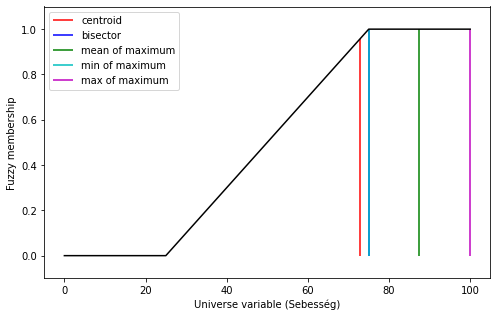

In [ ]:

# Ugyan az mint az eredeti sebességnél
# Sebesség    = ctrl.Consequent(np.arange(0, 101, 1), 'speed')

print(Sebesség.universe.shape)

speed = np.arange(0, 101, 1)
mfx = fuzzy.trapmf(speed, [25, 75, 100, 100])

# 5 féle beépített de-fuzzifikációs módszere van
# kattints rá egérrel a defuzz metódusra és kiadja a leírását -> abból
# látszik, hogy a fuzzy.defuzzify.centroid metodust használja -> lásd lent
defuzz_centroid = fuzzy.defuzz(speed, mfx, 'centroid')
defuzz_bisector = fuzzy.defuzz(speed, mfx, 'bisector')
defuzz_mom      = fuzzy.defuzz(speed, mfx, 'mom')
defuzz_som      = fuzzy.defuzz(speed, mfx, 'som')
defuzz_lom      = fuzzy.defuzz(speed, mfx, 'lom')

# Olvasd el a dokumentációját
defuzz_centroid = fuzzy.defuzzify.centroid(speed, mfx)
#
# Defuzzification using centroid (`center of gravity`) method.

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']

xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]

colors = ['r', 'b', 'g', 'c', 'm']

ymax = [fuzzy.interp_membership(speed, mfx, i) for i in xvals]

# Print centroid
print('Centroid :', defuzz_centroid)

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(speed, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (Sebesség)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

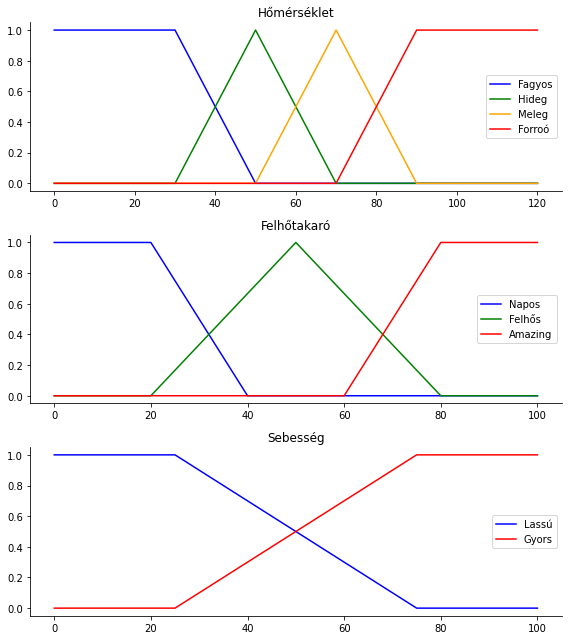

In [ ]:

x_homerseklet = np.arange(0, 121, 1)
x_felhotakaro = np.arange(0, 101, 1)
x_sebesseg    = np.arange(0, 101, 1)


x_homerseklet = np.arange(0, 120.1, 0.1)
x_felhotakaro = np.arange(0, 100.1, 0.1)
x_sebesseg    = np.arange(0, 101, 1)


# Generate fuzzy membership functions
fagyos = fuzzy.trapmf(x_homerseklet, [0, 0, 30, 50])
hideg  = fuzzy.trimf(x_homerseklet, [30, 50, 70])
meleg  = fuzzy.trimf(x_homerseklet, [50, 70, 90])
forro  = fuzzy.trapmf(x_homerseklet, [70, 90, 120, 120])

napos  = fuzzy.trapmf(x_felhotakaro, [0, 0, 20, 40])
felhos = fuzzy.trimf(x_felhotakaro, [20, 50, 80])
borus  = fuzzy.trapmf(x_felhotakaro, [60, 80, 100, 100])

lassu  = fuzzy.trapmf(x_sebesseg, [0, 0, 25, 75])
gyors  = fuzzy.trapmf(x_sebesseg, [25, 75, 100, 100])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_homerseklet, fagyos, 'b', linewidth=1.5, label='Fagyos')
ax0.plot(x_homerseklet, hideg,  'g', linewidth=1.5, label='Hideg')
ax0.plot(x_homerseklet, meleg,  color = 'orange', linewidth=1.5, label='Meleg')
ax0.plot(x_homerseklet, forro,  'r', linewidth=1.5, label='Forroó')
ax0.set_title('Hőmérséklet')
ax0.legend()

ax0.plot()

ax1.plot(x_felhotakaro, napos,  'b', linewidth=1.5, label='Napos')
ax1.plot(x_felhotakaro, felhos, 'g', linewidth=1.5, label='Felhős')
ax1.plot(x_felhotakaro, borus,  'r', linewidth=1.5, label='Amazing')
ax1.set_title('Felhőtakaró')
ax1.legend()

ax2.plot(x_sebesseg, lassu, 'b', linewidth=1.5, label='Lassú')
ax2.plot(x_sebesseg, gyors, 'r', linewidth=1.5, label='Gyors')
ax2.set_title('Sebesség')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

napos_level  : 0.75
meleg_level  : 0.5
felhos_level : 0.16666666666666666
hideg_level  : 0.5
active_rule1 -> gyors: 0.5
active_rule2 -> lassu: 0.16666666666666666


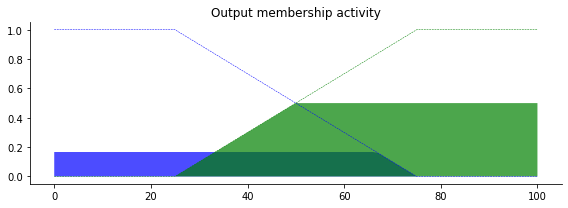

In [ ]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzzy.interp_membership exists for!

homerseklet = 60
felhotakaro = 25

fagyos_level = fuzzy.interp_membership(x_homerseklet, fagyos, homerseklet)
hideg_level  = fuzzy.interp_membership(x_homerseklet, hideg,  homerseklet)
meleg_level  = fuzzy.interp_membership(x_homerseklet, meleg,  homerseklet)
forro_level  = fuzzy.interp_membership(x_homerseklet, forro,  homerseklet)

napos_level  = fuzzy.interp_membership(x_felhotakaro, napos,  felhotakaro)
felhos_level = fuzzy.interp_membership(x_felhotakaro, felhos, felhotakaro)
borus_level  = fuzzy.interp_membership(x_felhotakaro, borus,  felhotakaro)

print('napos_level  :', napos_level)
print('meleg_level  :', meleg_level)

print('felhos_level :', felhos_level)
print('hideg_level  :', hideg_level)

# Az első szabály azt mondja ki, hogy a napos_level és a meleg_level közül
# válassza a kisebb értéket (AND feltétel)
active_rule1 = np.fmin(napos_level, meleg_level)

# Ebben az esetben olyan mint az OR
# active_rule1 = np.fmax(napos_level, meleg_level)

print('active_rule1 -> gyors:', active_rule1)

# A második szabály azt mondja ki, hogy a felhos_level és a hideg_level
# közül válassza a kissebb értéket (AND feltétel)
active_rule2 = np.fmin(felhos_level, hideg_level)

# Ebben az esetben olyan mint az OR
# active_rule2 = np.fmax(felhos_level, hideg_level)

print('active_rule2 -> lassu:', active_rule2)




# Az active_rule1 hez hozzárendeljük a gyors értéket
sebesseg_activation_gyors = np.fmin(active_rule1, gyors)

# Az active_rule2 hez hozzárendeljük a lassu értéket
sebesseg_activation_lassu = np.fmin(active_rule2, lassu)




# Create array
seb = np.zeros_like(x_sebesseg)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_sebesseg, seb, sebesseg_activation_lassu, facecolor='b', alpha=0.7)
ax0.plot(x_sebesseg, lassu, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_sebesseg, seb, sebesseg_activation_gyors, facecolor='g', alpha=0.7)
ax0.plot(x_sebesseg, gyors, 'g', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Plot
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

sebesseg : 61.10940865177528


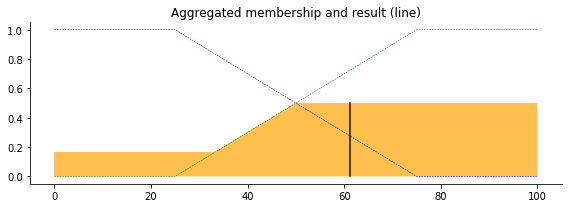

In [ ]:
# Aggregate all three output membership functions together
aggregated = np.fmax(sebesseg_activation_lassu, sebesseg_activation_gyors)

# Calculate defuzzified result
sebesseg = fuzzy.defuzz(x_sebesseg, aggregated, 'centroid')

print('sebesseg :', sebesseg)

# for plotting
seb_activation = fuzzy.interp_membership(x_sebesseg, aggregated, sebesseg) 

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_sebesseg, lassu, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_sebesseg, gyors, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_sebesseg, seb, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([sebesseg, sebesseg], [0, seb_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()